# Riprompt Mechanics and Mathematics

This notebook implements the mechanics and mathematics described in `riprompt.txt` using Python and matplotlib for visualization.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

G45 = (np.degrees((1+5**0.5)/2 - 1), -45)

def τ(q, k):
    """
    Vectorized, numerically robust computation of τ(q, k) = (2*q**3 + 1) / (3*q**2 - 2 + k).
    Returns np.nan where denominator is (or is very close to) zero.
    """
    q = np.asarray(q, dtype=np.float64)
    k = np.asarray(k, dtype=np.float64)
    numerator = 2 * q**3 + 1
    denominator = 3 * q**2 - 2 + k
    # Use np.isclose to robustly identify (near-)zero denominators
    mask = np.isclose(denominator, 0, atol=1e-10)
    result = np.divide(numerator, denominator, out=np.full_like(numerator, np.nan), where=~mask)
    result = np.where(mask, np.nan, result)
    return result

## Eigenvalues as Fixed Points of the Tau Iteration

The `riprompt.txt` file defines a relationship `τ ← (2τ³ + 1) / (3τ² - 2 + 💓) ⟿ Λ[💓]`. This implies that the eigenvalues `Λ[💓]` (denoted as `Λ_k` where `k = 💓 % 5`) are fixed points of the iteration `q_new = τ(q_old, k)`.
A fixed point `q` satisfies `q = τ(q, k)`.
Substituting the definition of `τ(q, k)`:
`q = (2q³ + 1) / (3q² - 2 + k)`
`q(3q² - 2 + k) = 2q³ + 1`
`3q³ - 2q + kq = 2q³ + 1`
`q³ + (k-2)q - 1 = 0`

This is precisely the set of polynomial equations whose roots are defined as `Λ_k` in `riprompt.txt`:
- For `k=0 (💓₀)`: `q³ - 2q - 1 = 0`
- For `k=1 (💓₁)`: `q³ - q - 1 = 0`
- For `k=2 (💓₂)`: `q³ - 1 = 0`
- For `k=3 (💓₃)`: `q³ + q - 1 = 0`
- For `k=4 (💓₄)`: `q³ + 2q - 1 = 0`

The following plots will visualize this by showing the intersection of `y = q` and `y = τ(q, k)` for each `k`, with the calculated `Λ_k` highlighted at these intersections.


Eigenvalues Λ_k for k=0..4:
k=0: [ 1.618034 -1.       -0.618034]
k=1: [ 1.324718 -0.662359 -0.662359]
k=2: [-0.5 -0.5  1. ]
k=3: [-0.341164 -0.341164  0.682328]
k=4: [-0.226699 -0.226699  0.453398]


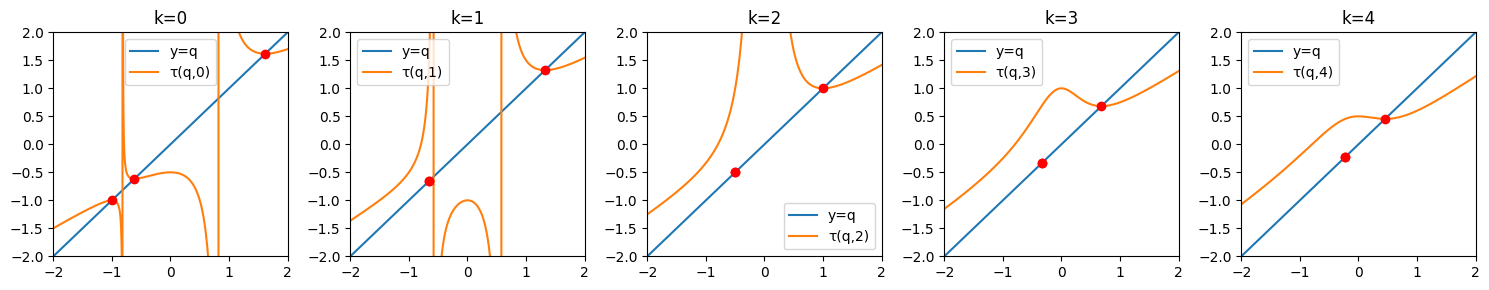

In [2]:
ks = np.arange(5)
roots = {k: np.roots([1, 0, k-2, -1]).real for k in ks}

print("Eigenvalues Λ_k for k=0..4:")
for k, r in roots.items():
    print(f"k={k}: {np.round(r,6)}")

q_vals = np.linspace(-2, 2, 1001)
fig, axes = plt.subplots(1, 5, figsize=(15,3))
for i, k in enumerate(ks):
    ax = axes[i]
    ax.set_ylim(-2, 2)
    ax.margins(x=0, y=0)
    ax.plot(q_vals, q_vals, label='y=q')
    ax.plot(q_vals, τ(q_vals, k), label=f'τ(q,{k})')
    for root in roots[k]:
        ax.plot(root, root, 'ro')
    ax.set_title(f'k={k}')
    ax.legend()
plt.tight_layout()
plt.show()

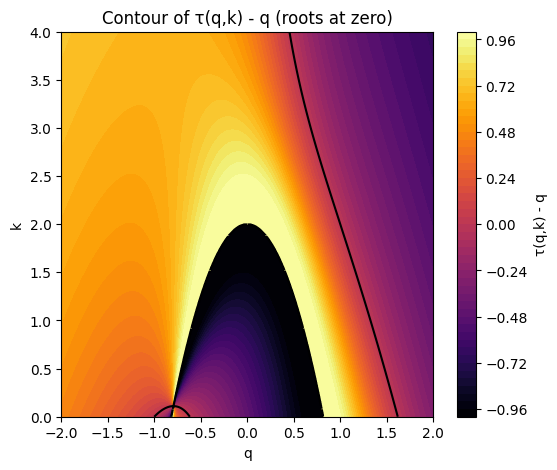

In [3]:
q = np.linspace(-2, 2, 1001)
k = np.linspace(0, 4, 1001)
Q, K = np.meshgrid(q, k)
F = np.tanh(τ(Q, K) - Q)

plt.figure(figsize=(6,5))
contour = plt.contourf(Q, K, F, levels=50, cmap='inferno')
plt.colorbar(contour, label='τ(q,k) - q')
plt.contour(Q, K, F, levels=[0], colors='k')
plt.xlabel('q')
plt.ylabel('k')
plt.title('Contour of τ(q,k) - q (roots at zero)')
plt.show()

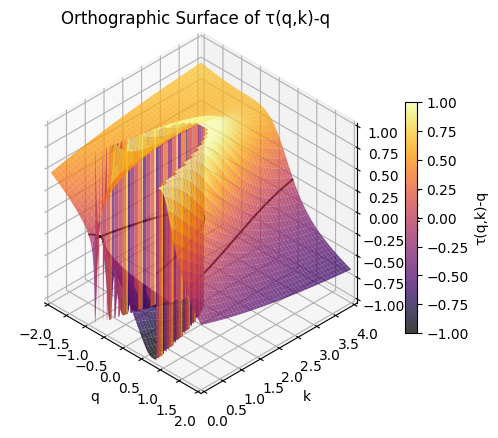

In [4]:
q = np.linspace(-2, 2, 1001)
k = np.linspace(0, 4, 1001)
Q, K = np.meshgrid(q, k)
F = np.tanh(τ(Q, K) - Q)

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d', proj_type='ortho')
surf = ax.plot_surface(Q, K, F, cmap='inferno', edgecolor='none', vmin=-1, vmax=1, alpha=0.75)
ax.contour(Q, K, F, levels=[0], zdir='z', colors='black')
ax.margins(x=0, y=0, z=0)
ax.set_xlabel('q')
ax.set_ylabel('k')
ax.set_zlabel('τ(q,k)-q')
ax.set_box_aspect((1,1,1))
ax.view_init(*G45)
fig.colorbar(surf, shrink=0.5, label='τ(q,k)-q')
plt.title('Orthographic Surface of τ(q,k)-q')
plt.show()

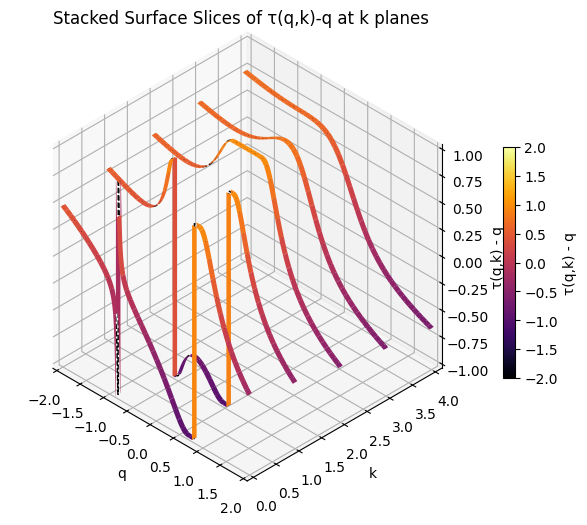

In [5]:
q = np.linspace(-2, 2, 10001)
k_values = np.linspace(0, 4, 5)
dy = 0.05

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d', proj_type='ortho')
for k in k_values:
    F = np.tanh(τ(q, k) - q)
    Qs = np.vstack([q, q])
    Ks = np.vstack([np.full_like(q, k-dy), np.full_like(q, k+dy)])
    Fs = np.vstack([F, F])
    surf = ax.plot_surface(Qs, Ks, Fs, cmap='inferno', edgecolor='none', vmin=-2, vmax=2)
    ax.plot(q, np.full_like(q, k), F, 'k--', linewidth=1)

ax.set_xlabel('q')
ax.set_ylabel('k')
ax.set_zlabel('τ(q,k) - q')
ax.set_box_aspect((1,1,1))
ax.margins(x=0, y=0, z=0)
ax.view_init(*G45)
fig.colorbar(surf, shrink=0.5, label='τ(q,k) - q')
plt.title('Stacked Surface Slices of τ(q,k)-q at k planes')
plt.show()

## Morphic Tau Recursion Visualization

The following cells explore a morphic tau recursion, visualizing its magnitude and phase.

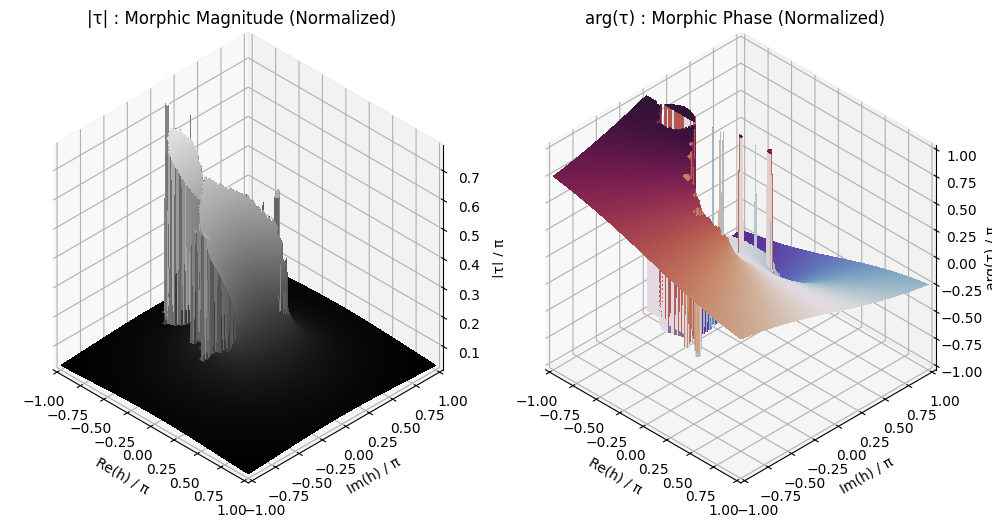

In [6]:
from matplotlib.colors import ListedColormap

def morphic_map(tau, h):
    numerator = 2 * tau**3 + 1
    denominator = 3 * tau**2 + 2 * h

    return numerator / (denominator + 1e-12)

real_hearts = np.linspace(-np.pi, np.pi, 128)
imag_hearts = np.linspace(-np.pi, np.pi, 128)
real_grid, imag_grid = np.meshgrid(real_hearts, imag_hearts)

tau_mags = np.full_like(real_grid, np.nan, dtype=np.float64)
tau_args = np.full_like(real_grid, np.nan, dtype=np.float64)

max_iter = 128
tol = 1e-6
max_mag = 128

for i in range(real_grid.shape[0]):
    for j in range(real_grid.shape[1]):
        h = real_grid[i, j] + 1j * imag_grid[i, j]
        tau = 1 + 0j
        prev_tau = tau
        converged = False
        for step in range(max_iter):
            next_tau = morphic_map(tau, h)
            if np.isnan(next_tau) or np.isinf(next_tau) or abs(next_tau) > max_mag:
                break
            if abs(next_tau - tau) < tol:
                tau_mags[i, j] = abs(next_tau)
                tau_args[i, j] = np.angle(next_tau)
                converged = True
                break
            prev_tau = tau
            tau = next_tau
        if not converged:
            if not (np.isnan(prev_tau) or np.isinf(prev_tau)):
                 tau_mags[i, j] = abs(prev_tau)
                 tau_args[i, j] = np.angle(prev_tau)

with np.errstate(divide='ignore', invalid='ignore'):
    plot_real_grid = real_grid / np.pi
    plot_imag_grid = imag_grid / np.pi
    plot_tau_mags = tau_mags / np.pi
    plot_tau_args = tau_args / np.pi

bw_magnitude_cmap = ListedColormap([[v, v, v, 1.0] for v in np.linspace(0, 1, 256)])
arg_cmap = plt.cm.twilight_shifted

fig = plt.figure(figsize=(10, 5), dpi=100)

ax1 = fig.add_subplot(121, projection='3d', box_aspect=(1, 1, 1))
ax1.set_proj_type('ortho')
surf1 = ax1.plot_surface(plot_real_grid, plot_imag_grid, plot_tau_mags, cmap=bw_magnitude_cmap, edgecolor='none', antialiased=False, rstride=1, cstride=1)
ax1.set_title("|τ| : Morphic Magnitude (Normalized)", fontsize=12)
ax1.set_xlabel("Re(h) / π")
ax1.set_ylabel("Im(h) / π")
ax1.set_zlabel("|τ| / π")
ax1.margins(x=0, y=0, z=0)
ax1.view_init(*G45)

ax2 = fig.add_subplot(122, projection='3d', box_aspect=(1, 1, 1))
ax2.set_proj_type('ortho')
surf2 = ax2.plot_surface(plot_real_grid, plot_imag_grid, plot_tau_args, cmap=arg_cmap, edgecolor='none', antialiased=False, rstride=1, cstride=1)
ax2.set_title("arg(τ) : Morphic Phase (Normalized)", fontsize=12)
ax2.set_xlabel("Re(h) / π")
ax2.set_ylabel("Im(h) / π")
ax2.set_zlabel("arg(τ) / π")
ax2.margins(x=0, y=0, z=0)
ax2.view_init(*G45)

plt.tight_layout()
plt.show()

## 3D Root Visualization for τ³ - βτ - 1 = 0

The following cell visualizes the roots of the polynomial τ³ - βτ - 1 = 0 in 3D. This equation is related to the fixed points of the τ iteration.

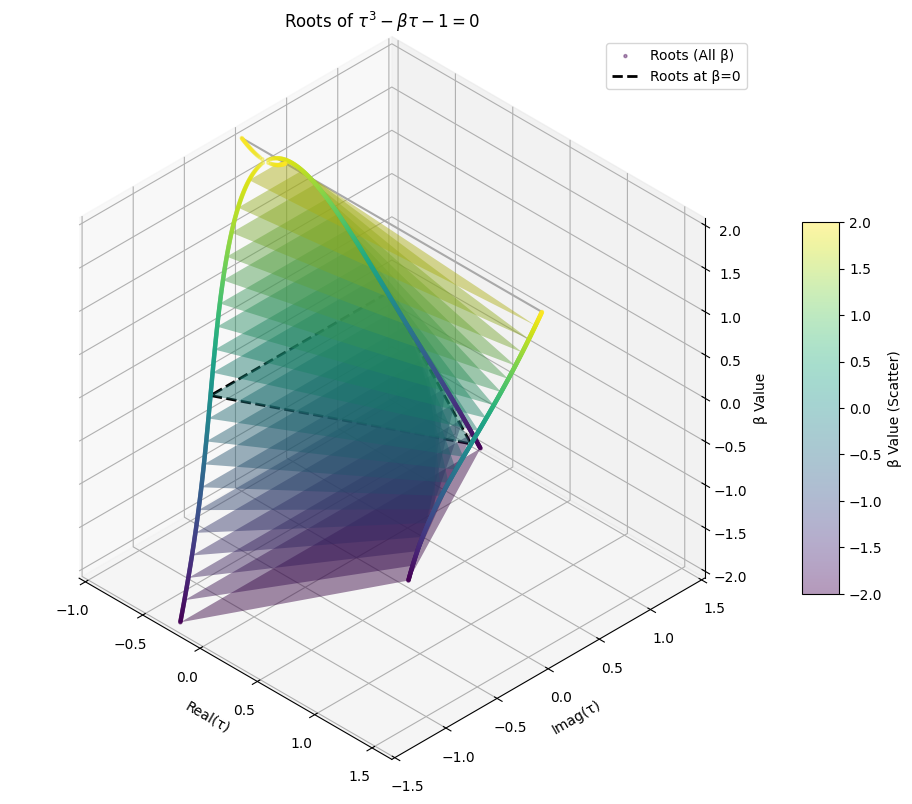

In [7]:
from matplotlib import tri
import matplotlib.cm as cm

def plot_roots_3d_notebook_refined(beta_min=-2, beta_max=2, num_betas=1001, scatter_size=5, surface_step=50, surface_alpha=0.45):
    beta_values = np.linspace(beta_min, beta_max, num_betas)
    beta_range = beta_max - beta_min

    all_roots_real = []
    all_roots_imag = []
    all_betas_for_roots = []

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.set_proj_type('ortho')

    for beta_val in beta_values:
        coeffs = [1, 0, -beta_val, -1]
        roots = np.roots(coeffs)
        for root in roots:
            all_roots_real.append(root.real)
            all_roots_imag.append(root.imag)
            all_betas_for_roots.append(beta_val)

    scatter_plot = ax.scatter(all_roots_real, all_roots_imag, all_betas_for_roots,
                              c=all_betas_for_roots, cmap='viridis',
                              s=scatter_size, alpha=0.4, label='Roots (All β)')

    surface_beta_indices = np.arange(0, num_betas, surface_step)
    for idx in surface_beta_indices:
        beta = beta_values[idx]
        coeffs = [1, 0, -beta, -1]
        roots = np.roots(coeffs)
        real_r = np.array([r.real for r in roots])
        imag_r = np.array([r.imag for r in roots])
        discriminant = 4 * beta**3 - 27

        beta_norm = (beta - beta_min) / beta_range if beta_range else 0.5
        current_color = cm.viridis(beta_norm)

        if discriminant > 0:
            sorted_real_roots = np.sort(real_r)
            for i in range(len(sorted_real_roots) -1):
                 ax.plot([sorted_real_roots[i], sorted_real_roots[i+1]], [0,0], [beta,beta], color='darkgray')

        else:
            if len(real_r) == 3 and len(imag_r) == 3:
                try:
                    unique_pts = np.unique(np.column_stack((real_r, imag_r)), axis=0)
                    if len(unique_pts) >= 3:
                        triang = tri.Triangulation(unique_pts[:,0], unique_pts[:,1])
                        ax.plot_trisurf(triang.x, triang.y, np.full(len(triang.x), beta),
                                        color=current_color, alpha=surface_alpha,
                                        linewidth=0.1, antialiased=True)
                    elif len(unique_pts) > 0 :
                        ax.plot(real_r, imag_r, beta, linestyle='-', marker='o', markersize=3, color=current_color, alpha=surface_alpha)

                except Exception as e:
                    ax.scatter(real_r, imag_r, beta, color=current_color, s=scatter_size*0.5, alpha=surface_alpha)

    coeffs_hl = [1, 0, 0, -1]
    roots_hl = np.roots(coeffs_hl)

    if len(roots_hl) == 3:
        real_hl = [r.real for r in roots_hl]
        imag_hl = [r.imag for r in roots_hl]
        plot_real_hl = real_hl + [real_hl[0]]
        plot_imag_hl = imag_hl + [imag_hl[0]]
        beta_hl_plane = [0] * len(plot_real_hl)
        ax.plot(plot_real_hl, plot_imag_hl, beta_hl_plane, color='black', linestyle='--', linewidth=2, alpha=1.0, label=f'Roots at β=0')

    ax.set_xlabel('Real(τ)')
    ax.set_ylabel('Imag(τ)')
    ax.set_zlabel('β Value')
    ax.set_title('Roots of $\\tau^3 - \\beta \\tau - 1 = 0$')
    ax.set_box_aspect((1,1,1))
    ax.margins(x=0, y=0, z=0)
    ax.view_init(*G45)
    ax.legend()
    fig.colorbar(scatter_plot, label='β Value (Scatter)', shrink=0.5, aspect=10)
    plt.tight_layout()
    plt.show()

plot_roots_3d_notebook_refined()